# Light GBM and XG Boost Algorithms

## Exploratory Data Analysis (EDA):

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\SHREYAS\Desktop\Titanic_train.csv")

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
# Handeling missing values:

In [9]:
df = df.dropna(subset=['Embarked'])

In [11]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [12]:
df['Cabin'].fillna('Unknown', inplace=True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

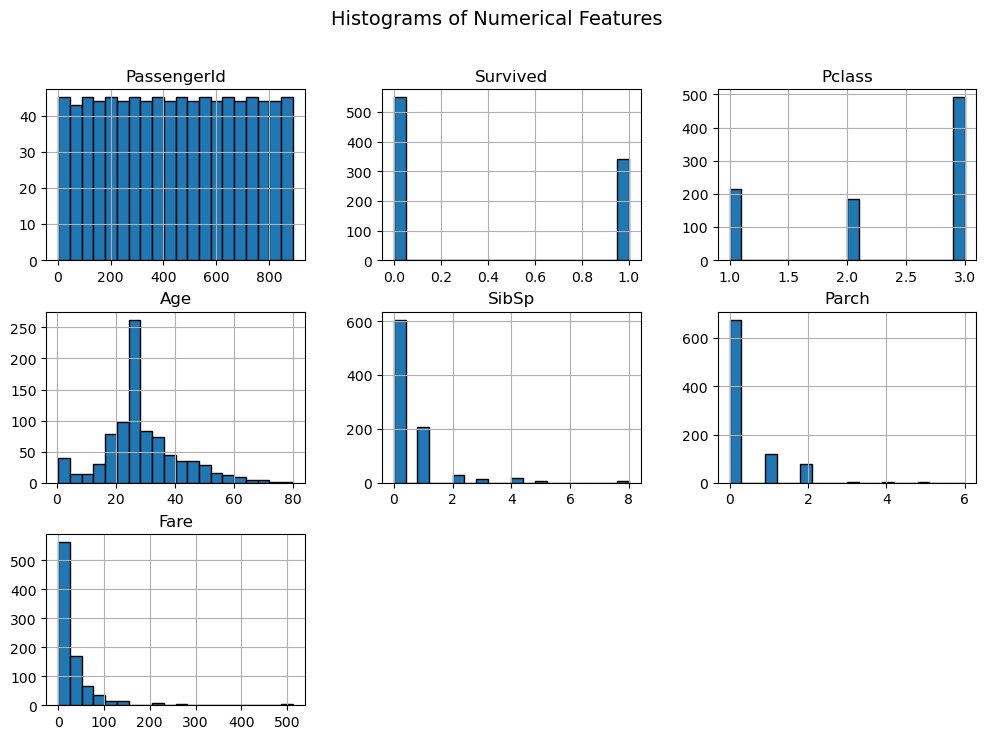

In [16]:
# Plot histograms

df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()

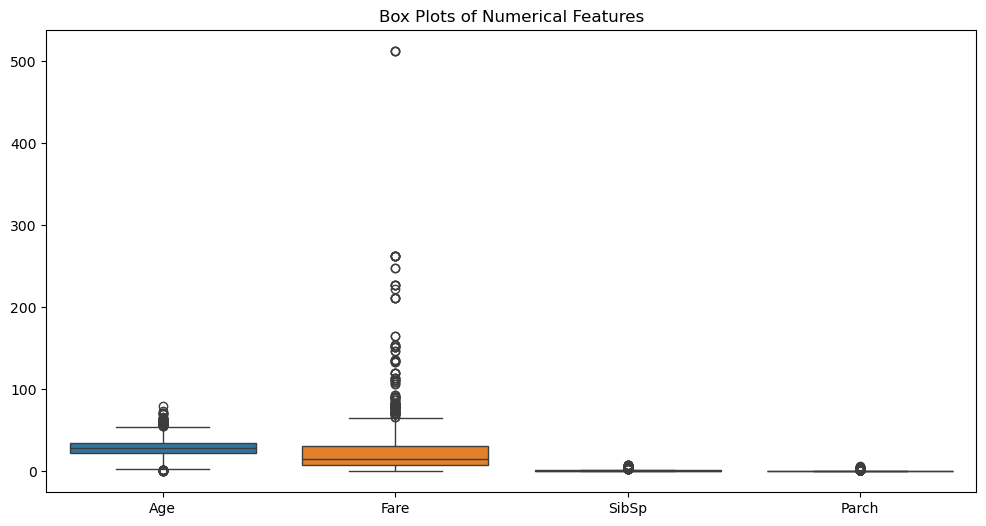

In [17]:
# Box plot

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Fare', 'SibSp', 'Parch']])
plt.title("Box Plots of Numerical Features")
plt.show()

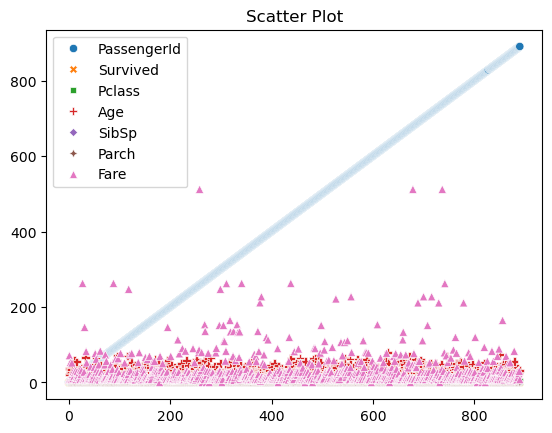

In [20]:
# Scatter plot

sns.scatterplot(df)
plt.title("Scatter Plot")
plt.show()

C:\Users\SHREYAS\AppData\Local\Temp\ipykernel_1940\67033666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df, palette="coolwarm")


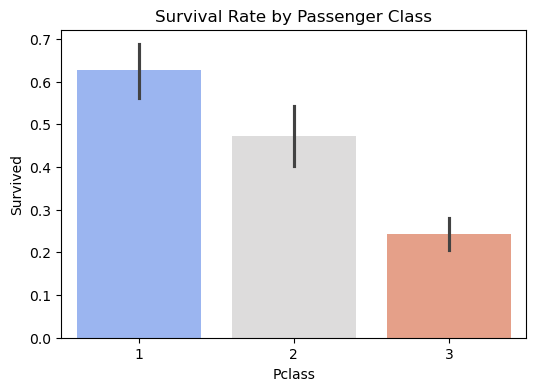

In [21]:
# Survival rate by passenger class

plt.figure(figsize=(6, 4))
sns.barplot(x="Pclass", y="Survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Passenger Class")
plt.show()

## Data Preprocessing:

In [22]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [23]:
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

# Encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


## Building Predictive Models:

In [26]:
!pip install lightgbm xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 558.9 kB/s eta 0:04:28
   ---------------------------------------- 0.8/150.0 MB 729.2 kB/s eta 0:03:25
   ---------------------------------------- 0.8/150.0 MB 729.2 kB/s eta 0:03:25
   ---------------------------------------- 1.0/150.0 MB 671.0 kB/s eta 0:03:42
   ---------------------------------------- 1.0/150.0 MB 671.0 kB/s eta 0:03:42
   ---------------------------------------- 1.0/150.0 MB 671.0 kB/s eta 0:03:42
   ---------------------------------------- 1.3/150.0 MB 583.5 kB/s eta 0:04:15
   -----------

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb

In [28]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

In [30]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,1
887,1,0,19.0,0,0,30.0000,0,1
888,3,0,28.0,1,2,23.4500,0,1
889,1,1,26.0,0,0,30.0000,0,0


In [31]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
# Train LightGBM model

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 272, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382560 -> initscore=-0.478697
[LightGBM] [Info] Start training from score -0.478697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [36]:
# Train XGBoost model

#xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

## Comparative Analysis:

In [37]:
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }

In [39]:
lgb_metrics = evaluate_model(y_test, y_pred_lgb)
xgb_metrics = evaluate_model(y_test, y_pred_xgb)

print(lgb_metrics)
print(xgb_metrics)

{'Accuracy': 0.8202247191011236, 'Precision': 0.7727272727272727, 'Recall': 0.75, 'F1-score': 0.7611940298507462}
{'Accuracy': 0.8089887640449438, 'Precision': 0.7297297297297297, 'Recall': 0.7941176470588235, 'F1-score': 0.7605633802816901}


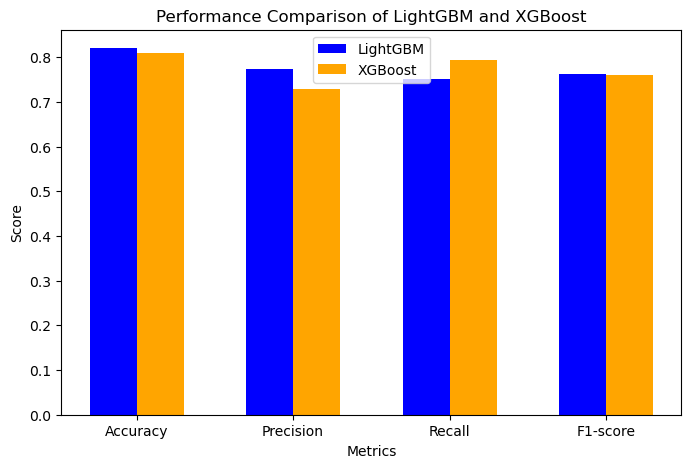

In [41]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
lgb_scores = [lgb_metrics[m] for m in metrics]
xgb_scores = [xgb_metrics[m] for m in metrics]

x = np.arange(len(metrics))
width = 0.3

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, lgb_scores, width, label='LightGBM', color='blue')
ax.bar(x + width/2, xgb_scores, width, label='XGBoost', color='orange')

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Performance Comparison of LightGBM and XGBoost')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()
